# Import Library

In [1]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import skew, kurtosis

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers,Sequential,losses,optimizers,datasets

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

def setup_seed(seed):
    random.seed(seed)  # 为python设置随机种子
    np.random.seed(seed)  # 为numpy设置随机种子
    tf.random.set_seed(seed)  # tf cpu fix seed
    os.environ['TF_DETERMINISTIC_OPS'] = '1'  # tf gpu fix seed, please `pip install tensorflow-determinism` first

setup_seed(2020)


seed = 2020
random.seed = 2020
np.random.seed = 2020
tf.seed = 2020
tf.random.set_seed(2020)

# Data processing

In [2]:
import scipy.io as scio
import pandas as pd

#input
feature1 = r'\Training dataset\ACC_UD.mat'
data1 = scio.loadmat(feature1)
AA=data1['ACC_UD']
A=AA[:,0:300]

feature2 = r'\Training dataset\ACC_EW.mat'
data2 = scio.loadmat(feature2)
BB=data2['ACC_EW']
B=BB[:,0:300]

feature3 = r'\Training dataset\ACC_NS.mat'
data3 = scio.loadmat(feature3)
CC=data3['ACC_NS']
C=CC[:,0:300]




label = pd.read_csv(open(r'\Training dataset\lable.csv',encoding='UTF-8'))


In [3]:
raw_data1=np.hstack((A,B))
train_xx=np.hstack((raw_data1,C))


#print(train_xx.shape)


y_data=label.iloc[:,[1,3]].values  #知识嵌入
#y_data=label.iloc[:,[12]].values    #导入数据  iloc通过行号获取行数据
#print(y_data[0])
#print(y_data.shape)

In [4]:
train_y=y_data[:,[1]] #y_train_lable
dis_train=y_data[:,[0]] #train_site_distance


#print(train_y.shape)
#print(dis_train.shape)



In [5]:
train_x=[]
for i in range(len(train_xx)):
    train_x.append(np.array(train_xx[i].reshape(3,1,300)).T)

In [6]:
train_dis=[]
for i in range(len(dis_train)):
    train_dis.append(np.array(dis_train[i].reshape(1,1,1)).T)

In [7]:
train_x=np.array(train_x)
train_dis=np.array(train_dis)
#test_x=np.array(test_x)

In [8]:
#3#  ##Reshaping
train_x = np.reshape(train_x, (train_x.shape[0], 300, 3))
train_dis = np.reshape(train_dis, (train_dis.shape[0], 1, 1))
#test_x = np.reshape(test_x, (test_x.shape[0], 300, 9))
#print("0",train_x.shape[0])
#print("1",train_x.shape[1])
#print(train_x.shape)
#print(train_x)

# CNN-Mag architecture, training and testing

In [9]:
def LocalEncoder(x):


    e = tf.keras.layers.Conv1D(16,kernel_size=2,strides=1,    #  2第一个卷积层, 124个 4x4 卷积核  2020   10 0.251 
                  kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2020),\
                  bias_initializer=keras.initializers.Zeros(),\
                  input_shape = (300,9),padding="same")(x) 
    e = tf.keras.layers.ReLU()(e) # 激活函数ReLU 
    e = tf.keras.layers.BatchNormalization()(e) 
    e = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(e) # 高宽各减半的池化层  pool_size=2


    e = tf.keras.layers.Conv1D(32,kernel_size=2,strides=1,   # 第二个卷积层, 32 个 4x4 卷积核     50 0.329
                  kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2020),\
                  bias_initializer=keras.initializers.Zeros(),\
                  padding="same")(e) 
    e = tf.keras.layers.ReLU()(e) # 激活函数ReLU 
    e = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(e) # 高宽各减半的池化层  pool_size=2
    
    e = tf.keras.layers.Conv1D(64,kernel_size=2,strides=1,   # 第二个卷积层, 32 个 4x4 卷积核     50 0.329
                  kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2020),\
                  bias_initializer=keras.initializers.Zeros(),\
                  padding="same")(e) 
    e = tf.keras.layers.ReLU()(e) # 激活函数ReLU 
    e = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(e) # 高宽各减半的池化层  pool_size=2
    
    e = tf.keras.layers.Conv1D(128,kernel_size=2,strides=1,   # 第二个卷积层, 32 个 4x4 卷积核     50 0.329
                  kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2020),\
                  bias_initializer=keras.initializers.Zeros(),\
                  padding="same")(e) 
    e = tf.keras.layers.ReLU()(e) # 激活函数ReLU 
    e = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(e) # 高宽各减半的池化层  pool_size=2
    
    
    e = tf.keras.layers.Conv1D(256,kernel_size=2,strides=1,   # 第二个卷积层, 32 个 4x4 卷积核     50 0.329
                  kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2020),\
                  bias_initializer=keras.initializers.Zeros(),\
                  padding="same")(e) 
    e = tf.keras.layers.ReLU()(e) # 激活函数ReLU 
    e = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(e) # 高宽各减半的池化层  pool_size=2
    

    e = tf.keras.layers.Conv1D(512,kernel_size=2,strides=1,   # 第二个卷积层, 32 个 4x4 卷积核     50 0.329
                  kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2020),\
                  bias_initializer=keras.initializers.Zeros(),\
                  padding="same")(e) 
    e = tf.keras.layers.ReLU()(e) # 激活函数ReLU
    e = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(e) # 高宽各减半的池化层  pool_size=2
    
    
    e = tf.keras.layers.Conv1D(1024,kernel_size=2,strides=1,   # 第二个卷积层, 32 个 4x4 卷积核     50 0.329
                  kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2020),\
                  bias_initializer=keras.initializers.Zeros(),\
                  padding="same")(e) 
    e = tf.keras.layers.ReLU()(e) # 激活函数ReLU
    e = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(e) # 高宽各减半的池化层  pool_size=2
    
    e = tf.keras.layers.Conv1D(2048,kernel_size=2,strides=1,   # 第二个卷积层, 32 个 4x4 卷积核     50 0.329
                  kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2020),\
                  bias_initializer=keras.initializers.Zeros(),\
                  padding="same")(e) 
    e = tf.keras.layers.ReLU()(e) # 激活函数ReLU  
    e = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(e) # 高宽各减半的池化层  pool_size=2
    
    
    return e
    
    

In [10]:
seed=50
#50 17.20 1.32
drop_rate = 0.2
def get_model():

    inp1 = Input(shape=(300, 3), name='input_layer') 

    x1 = LocalEncoder(inp1)


    e = tf.keras.layers.Flatten()(x1) # 打平层，方便全连接层处理 

    e = layers.Dropout(rate=0.5)(e) #0.458
    e = tf.keras.layers.Dense(512,activation='relu')(e) # 全连接层，14节点  0.340 
    e = tf.keras.layers.Dense(256,activation='relu')(e) # 全连接层，14节点  0.340 
    e = tf.keras.layers.Dense(128,activation='relu')(e) # 全连接层，14节点  0.340 
    e = tf.keras.layers.Dense(64,activation='relu')(e) # 全连接层，14节点  0.340 
    e = tf.keras.layers.Dense(32,activation='relu')(e) # 全连接层，14节点  0.340 
    o = tf.keras.layers.Dense(1)(e) # 全连接层，10 个节点 
    
    

    rms = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model = Model(inp1, o)
    model.compile(optimizer = rms, loss = 'mean_squared_error')

    return model

In [11]:
model = get_model()
model.summary() 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 300, 3)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 16)           112       
_________________________________________________________________
re_lu (ReLU)                 (None, 300, 16)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 16)           64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 150, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 150, 32)           1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 150, 32)          

In [12]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(monitor="val_loss",
                               factor=0.1,
                                cooldown= 0,
                                patience= 5,
                                min_lr=0.1e-7)
early_stopping_monitor = EarlyStopping(monitor= 'val_loss', patience = 10) #10  17.20 1.32
callbacks = [lr_reducer, early_stopping_monitor]




model = get_model()
model.fit(train_x, train_y, epochs=300, batch_size=256,  
            validation_split=0.1, callbacks=callbacks)  #256 ,train_physics  ,test_physics ,train_physics

pred_train_all = model.predict(train_x).ravel()
#pred_test_all = model.predict(test_x).ravel()  ##ravel() 转换成1列


#pred_valid_all = scaler_seq.inverse_transform(pred_valid_all)
#reverse_valid = scaler_seq.inverse_transform(y_valid)
#pred_test_all = scaler_seq.inverse_transform(pred_test_all)
#reverse_test = scaler_seq.inverse_transform(y_test)

Epoch 1/300
162/162 [==============================] - 16s 100ms/step - loss: 1.6060 - val_loss: 0.8811
Epoch 2/300
162/162 [==============================] - 16s 98ms/step - loss: 0.5266 - val_loss: 0.5961
Epoch 3/300
162/162 [==============================] - 16s 99ms/step - loss: 0.4443 - val_loss: 0.3833
Epoch 4/300
162/162 [==============================] - 16s 99ms/step - loss: 0.3922 - val_loss: 0.3706
Epoch 5/300
162/162 [==============================] - 16s 99ms/step - loss: 0.3325 - val_loss: 0.2590
Epoch 6/300
162/162 [==============================] - 16s 99ms/step - loss: 0.3049 - val_loss: 0.3115
Epoch 7/300
162/162 [==============================] - 16s 100ms/step - loss: 0.2895 - val_loss: 0.3506
Epoch 8/300
162/162 [==============================] - 16s 99ms/step - loss: 0.2703 - val_loss: 0.2997
Epoch 9/300
162/162 [==============================] - 16s 99ms/step - loss: 0.2555 - val_loss: 0.2619
Epoch 10/300
162/162 [==============================] - 16s 99ms/step -

In [13]:
# 保存权重（推荐方式）
model.save_weights("CNN_Mag_weights.h5")  # HDF5格式

In [14]:
def get_model_size_mb(model):
    params = model.count_params()
    # 假设所有参数为float32（4字节）
    size_mb = params * 4 / 1024**2
    return size_mb
 
print("Model size (MB):", get_model_size_mb(model))

Model size (MB): 30.016178131103516


训练标准差STD= 0.38938384283318533
训练误差均值MEAN= -0.01640650017208292
训练平均绝对误差MAE= 0.2859615057248036
训练RMSE= 0.3897293295447949
训练MAPE= 6.58238898879864
训练r2 score: 0.851789060196693


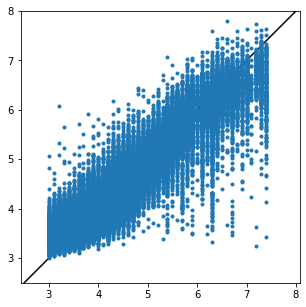

In [15]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("训练标准差STD=",np.std(pred_train_all-train_y.ravel()))
print("训练误差均值MEAN=",np.mean(pred_train_all-train_y.ravel()))
print("训练平均绝对误差MAE=",metrics.mean_absolute_error(pred_train_all, train_y.ravel()))
print("训练RMSE=",metrics.mean_squared_error(pred_train_all, train_y.ravel())**0.5)
print("训练MAPE=",np.mean(np.abs((train_y.ravel() - pred_train_all) / train_y.ravel())) * 100)
print("训练r2 score:", r2_score(train_y.ravel(), pred_train_all))


plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(2.5, 8, 0.01)
y3=x3
plt.plot(x3, y3, "black")
plt.plot(train_y.ravel(),pred_train_all,'.')
plt.xlim(2.5, 8)
plt.ylim(2.5, 8)
plt.show()

In [16]:
#########################保存训练结果####################################
pred_train_all=pred_train_all.reshape(pred_train_all.shape[0],1)

#y_score_tr=y_score_tr.reshape(y_score_tr.shape[0],1)
#print(pred_train_all.shape)
#print(train_y.shape)

tr_result=np.concatenate((train_y,pred_train_all),axis=1)

#print(tr_result.shape)

data_tr = pd.DataFrame(tr_result) #将数组转换为dataframe结构
data_tr.columns=['True M','Pred M']
writer_tr = pd.ExcelWriter(r'\CNN-Mag\magtrain.xls')   # 写入Excel文件

data_tr.to_excel(writer_tr,float_format='%.5f',index=False)   ## ‘page_1’是写入excel的sheet名
writer_tr.save()
writer_tr.close()
#########################保存训练结果####################################

In [17]:
#震例
import scipy.io as scio
import pandas as pd

#input
feature1z = r'\Test dataset\ACC_UD.mat'
data1z = scio.loadmat(feature1z)
AAz=data1z['ACC_UD']
Az=AAz[:,0:300]

feature2z = r'\Test dataset\ACC_EW.mat'
data2z = scio.loadmat(feature2z)
BBz=data2z['ACC_EW']
Bz=BBz[:,0:300]

feature3z = r'\Test dataset\ACC_NS.mat'
data3z = scio.loadmat(feature3z)
CCz=data3z['ACC_NS']
Cz=CCz[:,0:300]

feature4z = r'\Test dataset\VEL_UD.mat'
data4z = scio.loadmat(feature4z)
DDz=data4z['VEL_UD']
Dz=DDz[:,0:300]

feature5z = r'\Test dataset\VEL_EW.mat'
data5z = scio.loadmat(feature5z)
EEz=data5z['VEL_EW']
Ez=EEz[:,0:300]

feature6z = r'\Test dataset\VEL_NS.mat'
data6z = scio.loadmat(feature6z)
FFz=data6z['VEL_NS']
Fz=FFz[:,0:300]

feature7z = r'\Test dataset\DIS_UD.mat'
data7z = scio.loadmat(feature7z)
GGz=data7z['DIS_UD']
Gz=GGz[:,0:300]

feature8z = r'\Test dataset\DIS_EW.mat'
data8z = scio.loadmat(feature8z)
HHz=data8z['DIS_EW']
Hz=HHz[:,0:300]

feature9z = r'\Test dataset\DIS_NS.mat'
data9z = scio.loadmat(feature9z)
IIz=data9z['DIS_NS']
Iz=IIz[:,0:300]


labelz = pd.read_csv(open(r'\Test dataset\lable.csv',encoding='UTF-8'))


In [18]:
raw_data1z=np.hstack((Az,Bz))
x_dataz=np.hstack((raw_data1z,Cz))


y_dataz=labelz.iloc[:,[1,3]].values  #知识嵌入
#y_data=label.iloc[:,[12]].values    #导入数据  iloc通过行号获取行数据
#print(y_dataz[0])
#print(y_dataz.shape)

In [19]:
zhenli_y=y_dataz[:,[1]] #y_train_lable
dis_zhenli=y_dataz[:,[0]] #train_site_distance



In [20]:
zhenli_x=[]
for i in range(len(x_dataz)):
    zhenli_x.append(np.array(x_dataz[i].reshape(3,1,300)).T)

In [21]:
zhenli_dis=[]
for i in range(len(dis_zhenli)):
    zhenli_dis.append(np.array(dis_zhenli[i].reshape(1,1,1)).T)



In [22]:
zhenli_x=np.array(zhenli_x)
zhenli_dis=np.array(zhenli_dis)

In [23]:
zhenli_x = np.reshape(zhenli_x, (zhenli_x.shape[0], 300, 3))
zhenli_dis = np.reshape(zhenli_dis, (zhenli_dis.shape[0], 1, 1))

In [22]:
zhenli_x1=zhenli_x[0]
zhenli_x1=zhenli_x1.reshape(1, 300, 3)
print(zhenli_x1.shape)

(1, 300, 3)


In [24]:
import time
start_time = time.perf_counter()  # 记录开始时间
pred_zhenli_all = model.predict(zhenli_x1).ravel()  ##ravel() 转换成1列
end_time = time.perf_counter()  # 记录结束时间
elapsed_time_ms = (end_time - start_time) * 1000  # 转换为毫秒
print(f"Elapsed time: {elapsed_time_ms:.2f} ms")

Elapsed time: 37.40 ms


In [24]:
pred_zhenli_all = model.predict(zhenli_x).ravel()  ##ravel() 转换成1列

震例标准差STD= 0.4101542762102362
震例误差均值MEAN= -0.0563336766833301
震例平均绝对误差MAE= 0.31000491607570924
震例RMSE= 0.4140048470998917
震例MAPE= 7.152259387470786
震例r2 score: 0.8218234515077907


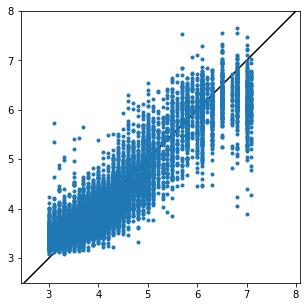

In [25]:
print("震例标准差STD=",np.std(pred_zhenli_all-zhenli_y.ravel()))
print("震例误差均值MEAN=",np.mean(pred_zhenli_all-zhenli_y.ravel()))
print("震例平均绝对误差MAE=",metrics.mean_absolute_error(pred_zhenli_all, zhenli_y.ravel()))
print("震例RMSE=",metrics.mean_squared_error(pred_zhenli_all, zhenli_y.ravel())**0.5)
print("震例MAPE=",np.mean(np.abs((zhenli_y.ravel() - pred_zhenli_all) / zhenli_y.ravel())) * 100)
print("震例r2 score:", r2_score(zhenli_y.ravel(), pred_zhenli_all))


plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(2.5, 8, 0.01)
y3=x3
plt.plot(x3, y3, "black")
plt.plot(zhenli_y.ravel(),pred_zhenli_all,'.')
plt.xlim(2.5, 8)
plt.ylim(2.5, 8)
plt.show()  

In [26]:
#########################保存震例结果####################################
pred_zhenli_all=pred_zhenli_all.reshape(pred_zhenli_all.shape[0],1)

#print(pred_zhenli_all.shape)
#print(zhenli_y.shape)

tz_result=np.concatenate((zhenli_y,pred_zhenli_all),axis=1)

#print(tz_result.shape)

data_tz = pd.DataFrame(tz_result) #将数组转换为dataframe结构
data_tz.columns=['True M','Pred M']
writer_tz = pd.ExcelWriter(r'\CNN-Mag\magtest.xls')   # 写入Excel文件

data_tz.to_excel(writer_tz,float_format='%.5f',index=False)   ## ‘page_1’是写入excel的sheet名
writer_tz.save()
writer_tz.close()
#########################保存震例结果####################################

# Test on the Chinese strong-ground motion data

In [27]:
#在中国地区的应用
import scipy.io as scio
import pandas as pd

#input
feature1z_CH = r'\Chinese strong-ground motion test dataset\ACC_UD.mat'
data1z_CH = scio.loadmat(feature1z_CH)
AAz_CH=data1z_CH['ACC_UD']
Az_CH=AAz_CH[:,0:300]

feature2z_CH = r'\Chinese strong-ground motion test dataset\ACC_EW.mat'
data2z_CH = scio.loadmat(feature2z_CH)
BBz_CH=data2z_CH['ACC_EW']
Bz_CH=BBz_CH[:,0:300]

feature3z_CH = r'\Chinese strong-ground motion test dataset\ACC_NS.mat'
data3z_CH = scio.loadmat(feature3z_CH)
CCz_CH=data3z_CH['ACC_NS']
Cz_CH=CCz_CH[:,0:300]

feature4z_CH = r'\Chinese strong-ground motion test dataset\VEL_UD.mat'
data4z_CH = scio.loadmat(feature4z_CH)
DDz_CH=data4z_CH['VEL_UD']
Dz_CH=DDz_CH[:,0:300]

feature5z_CH = r'\Chinese strong-ground motion test dataset\VEL_EW.mat'
data5z_CH = scio.loadmat(feature5z_CH)
EEz_CH=data5z_CH['VEL_EW']
Ez_CH=EEz_CH[:,0:300]

feature6z_CH = r'\Chinese strong-ground motion test dataset\VEL_NS.mat'
data6z_CH = scio.loadmat(feature6z_CH)
FFz_CH=data6z_CH['VEL_NS']
Fz_CH=FFz_CH[:,0:300]

feature7z_CH = r'\Chinese strong-ground motion test dataset\DIS_UD.mat'
data7z_CH = scio.loadmat(feature7z_CH)
GGz_CH=data7z_CH['DIS_UD']
Gz_CH=GGz_CH[:,0:300]

feature8z_CH = r'\Chinese strong-ground motion test dataset\DIS_EW.mat'
data8z_CH = scio.loadmat(feature8z_CH)
HHz_CH=data8z_CH['DIS_EW']
Hz_CH=HHz_CH[:,0:300]

feature9z_CH = r'\Chinese strong-ground motion test dataset\DIS_NS.mat'
data9z_CH = scio.loadmat(feature9z_CH)
IIz_CH=data9z_CH['DIS_NS']
Iz_CH=IIz_CH[:,0:300]


labelz_CH = pd.read_csv(open(r'\Chinese strong-ground motion test dataset\lable.csv',encoding='UTF-8'))


In [28]:
raw_data1z_CH=np.hstack((Az_CH,Bz_CH))
x_dataz_CH=np.hstack((raw_data1z_CH,Cz_CH))


y_dataz_CH=labelz_CH.iloc[:,[1,3]].values  #知识嵌入
#y_data=label.iloc[:,[12]].values    #导入数据  iloc通过行号获取行数据
#print(y_dataz_CH[0])
#print(y_dataz_CH.shape)

In [29]:
zhenli_y_CH=y_dataz_CH[:,[1]] #y_train_lable
dis_zhenli_CH=y_dataz_CH[:,[0]] #train_site_distance

In [30]:
zhenli_x_CH=[]
for i in range(len(x_dataz_CH)):
    zhenli_x_CH.append(np.array(x_dataz_CH[i].reshape(3,1,300)).T)

In [31]:
zhenli_x_CH=np.array(zhenli_x_CH)
zhenli_x_CH = np.reshape(zhenli_x_CH, (zhenli_x_CH.shape[0], 300, 3))

In [32]:
pred_zhenli_all_CH = model.predict(zhenli_x_CH).ravel()  ##ravel() 转换成1列

震例标准差STD= 0.4764866011110386
震例误差均值MEAN= 0.19033949803402814
震例平均绝对误差MAE= 0.3992924476900107
震例RMSE= 0.5130970722487079
震例MAPE= 9.182550809765676
震例r2 score: 0.5888594225194465


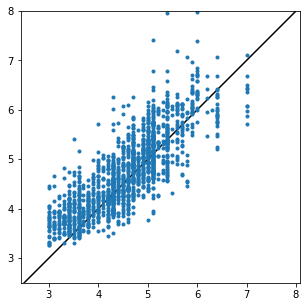

In [33]:
print("震例标准差STD=",np.std(pred_zhenli_all_CH-zhenli_y_CH.ravel()))
print("震例误差均值MEAN=",np.mean(pred_zhenli_all_CH-zhenli_y_CH.ravel()))
print("震例平均绝对误差MAE=",metrics.mean_absolute_error(pred_zhenli_all_CH, zhenli_y_CH.ravel()))
print("震例RMSE=",metrics.mean_squared_error(pred_zhenli_all_CH, zhenli_y_CH.ravel())**0.5)
print("震例MAPE=",np.mean(np.abs((zhenli_y_CH.ravel() - pred_zhenli_all_CH) / zhenli_y_CH.ravel())) * 100)
print("震例r2 score:", r2_score(zhenli_y_CH.ravel(), pred_zhenli_all_CH))


plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(2.5, 8, 0.01)
y3=x3
plt.plot(x3, y3, "black")
plt.plot(zhenli_y_CH.ravel(),pred_zhenli_all_CH,'.')
plt.xlim(2.5, 8)
plt.ylim(2.5, 8)
plt.show()  